##### <p style = "color: green;"> 👌😊 GROUP NO 19</p>    
***<h2 style = "text-align: Center;">TANZANIA TOURISM EXPENDITURE PREDICTION</h2>***  

####  IMPORTING ALL CRUCIAL LIBRARIES

In [1]:
import numpy as np # contains mathematical tools 
import matplotlib.pyplot as plt # for plotting charts
import pandas as pd #for importing and managing datasets
import os  # interraction with OS, for displaying the current working direimport pandas as pd

#### 1. On Load the Dataset

In [2]:
data = pd.read_csv('tanzania_tourism_expenditure.csv')

In [3]:
data

,Purpose_of_Visit,Hotel_Class,Length_of_Stay_Days,Daily_Spending_USD,Total_Expenditure_USD
0,Conference,Luxury,11.5,90.91,1045.46
1,VFR,Budget,9.1,378.94,3448.35
2,Leisure,Budget,7.7,269.70,2076.69
3,Conference,Standard,13.0,167.22,2173.86
4,Conference,Luxury,4.2,98.75,414.75
...,...,...,...,...,...
295,VFR,Luxury,12.9,265.55,3425.60
296,Business,Luxury,7.2,NaN,947.09
297,Conference,Standard,9.0,58.54,526.86
298,Leisure,Budget,13.0,354.53,4608.89


In [4]:
# Print basic information about the dataset (columns, types, missing values)
print("The Dataset Info:")
data.info()

The Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Purpose_of_Visit       279 non-null    object 
 1   Hotel_Class            279 non-null    object 
 2   Length_of_Stay_Days    279 non-null    float64
 3   Daily_Spending_USD     279 non-null    float64
 4   Total_Expenditure_USD  279 non-null    float64
dtypes: float64(3), object(2)
memory usage: 11.8+ KB


In [5]:
# To known the dimension of our data
data.shape

(300, 5)

In [6]:
print("\nMissing values before imputation:")
print(data.isnull().sum())  # Count missing values in each column


Missing values before imputation:
Purpose_of_Visit         21
Hotel_Class              21
Length_of_Stay_Days      21
Daily_Spending_USD       21
Total_Expenditure_USD    21
dtype: int64


In [7]:
# GETTING MATRIX OF FEATURES(DEPENDENT AND INDEPENDENT VARIABLES)

X = data.iloc[:,:-1].values #for independent variable
Y = data.iloc[:,4:5].values # for depennt variable

In [8]:
print(X)

[['Conference' 'Luxury' 11.5 90.91]
 ['VFR' 'Budget' 9.1 378.94]
 ['Leisure' 'Budget' 7.7 269.7]
 ...
 ['Conference' 'Standard' 9.0 58.54]
 ['Leisure' 'Budget' 13.0 354.53]
 ['VFR' 'Budget' 9.9 57.44]]


In [9]:
print(Y)

[[1045.46]
 [3448.35]
 [2076.69]
 [2173.86]
 [ 414.75]
 [2754.44]
 [ 827.79]
 [1941.02]
 [1306.3 ]
 [1401.84]
 [ 443.29]
 [1606.91]
 [    nan]
 [2917.57]
 [ 839.66]
 [1771.17]
 [1932.85]
 [4496.56]
 [ 933.52]
 [4589.18]
 [ 275.03]
 [4743.76]
 [ 331.17]
 [2419.84]
 [2895.64]
 [1424.33]
 [ 494.91]
 [2755.39]
 [4137.54]
 [2414.72]
 [2899.51]
 [2567.46]
 [1105.04]
 [1692.8 ]
 [1067.46]
 [4746.68]
 [ 889.66]
 [1160.83]
 [2857.95]
 [4883.84]
 [ 829.36]
 [2500.76]
 [1385.07]
 [1346.45]
 [ 456.35]
 [2451.16]
 [3536.66]
 [    nan]
 [4025.47]
 [5145.61]
 [3183.57]
 [ 920.17]
 [    nan]
 [3148.2 ]
 [2083.72]
 [    nan]
 [4901.39]
 [4487.4 ]
 [2784.39]
 [ 985.93]
 [3828.49]
 [    nan]
 [1245.28]
 [4653.62]
 [1240.61]
 [ 764.25]
 [    nan]
 [2256.84]
 [ 961.46]
 [ 786.4 ]
 [3144.5 ]
 [ 371.66]
 [2284.06]
 [2329.13]
 [2904.7 ]
 [3049.99]
 [1301.27]
 [1028.58]
 [1109.27]
 [2603.5 ]
 [1530.46]
 [2916.9 ]
 [1390.2 ]
 [1016.83]
 [2580.95]
 [2634.71]
 [4553.46]
 [1007.99]
 [2025.68]
 [1193.68]
 [ 736.83]

#### 2. Define Column Types Based On Our CSV Structure

In [10]:
num_imp = ["Length_of_Stay_Days", "Daily_Spending_USD"]

In [11]:
cat_imp = ["Purpose_of_Visit", "Hotel_Class"]

#### 3. Define Features (X) and Target (y)

In [12]:
# We predicting 'Total_Expenditure_USD'
X = data.drop("Total_Expenditure_USD", axis=1)
y = data["Total_Expenditure_USD"]

#### 4. Data Cleaning (Imputation)

In [13]:
# Fill missing numeric values with the median
X[num_imp] = X[num_imp].fillna(X[num_imp].median())

In [14]:
# Fill missing categorical values with the most frequent value (mode)
for col in cat_imp:
    X[col] = X[col].fillna(X[col].mode().iloc[0])

In [15]:
# Check if any missing values remain
print("\nMissing values after imputation:")
X.isnull().sum()


Missing values after imputation:


Purpose_of_Visit       0
Hotel_Class            0
Length_of_Stay_Days    0
Daily_Spending_USD     0
dtype: int64

In [16]:
# Check missing values
print(data["Total_Expenditure_USD"].isnull().sum())

21


In [17]:
# Impute missing values in Total_Expenditure_USD
median_value = data["Total_Expenditure_USD"].median()

data["Total_Expenditure_USD"].fillna(median_value, inplace=True)

print("Missing values after imputation:",
      data["Total_Expenditure_USD"].isnull().sum())


Missing values after imputation: 0


#### 5. One-Hot Encoding

In [18]:
# Converts categories into numerical columns (0s and 1s)
X = pd.get_dummies(X, columns=cat_imp, drop_first=True)

#### 6. Split data into Training (80%) and Testing (20%)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#### 7. Initialize and Train Models

#### a) Building a decision tree model

In [20]:
from sklearn.tree import DecisionTreeRegressor
#Create a DecisionTreeRegressor model
dt_model = DecisionTreeRegressor() 
#During the fit process, the model learns patterns and relationships in the data
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

#### b) Building a linear regression model

In [21]:
#fitting the linear regression model to the training set
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

#### 8. Predict on Test Set

In [22]:
# Make predictions on the test set to see how well the models perform
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

#### 9. Evaluation Function

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"--- {model_name} ---")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.4f}\n")
    return mae, rmse, r2

#### On Run Evaluation

In [24]:
mae_lr, rmse_lr, r2_lr = evaluate_model(y_test, lr_model.predict(X_test), "Linear Regression")
mae_dt, rmse_dt, r2_dt = evaluate_model(y_test, dt_model.predict(X_test), "Decision Tree")

--- Linear Regression ---
MAE  : 329.89
RMSE : 469.46
R²   : 0.8606

--- Decision Tree ---
MAE  : 400.15
RMSE : 677.19
R²   : 0.7099



#### 10. On Comparison

In [25]:
# Put evaluation metrics into a DataFrame for easy comparison
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "MAE": [mae_lr, mae_dt],
    "RMSE": [rmse_lr, rmse_dt],
    "R2": [r2_lr, r2_dt]
})

print("Model Comparison:")
comparison

Model Comparison:


,Model,MAE,RMSE,R2
0,Linear Regression,329.890072,469.457486,0.860592
1,Decision Tree,400.148167,677.190447,0.709921


#### 11. Select and Save the Best Model

In [26]:
if r2_lr > r2_dt:
    best_model = lr_model
    best_model_name = "Linear Regression"
else:
    best_model = dt_model
    best_model_name = "Decision Tree"

print(f"Best Model Selected: {best_model_name}")

Best Model Selected: Linear Regression


#### On Prediction of Sample

In [27]:
# Show first 15 predictions vs actual values

results = pd.DataFrame({
    "Actual": y_test.values[:15],
    "Predicted (Best Model)": best_model.predict(X_test)[:15]
})

print("\n Sample Predictions (First 15 rows):")
results


 Sample Predictions (First 15 rows):


,Actual,Predicted (Best Model)
0,4144.45,3700.097658
1,1369.72,1807.465050
2,556.15,151.542740
3,1401.84,1836.227229
4,1566.76,1058.310044
5,1084.78,1150.823692
6,930.14,1148.592894
7,715.40,960.344653
8,2754.44,1901.467942
9,410.81,280.127016


#### 12. On Drawing The Plot

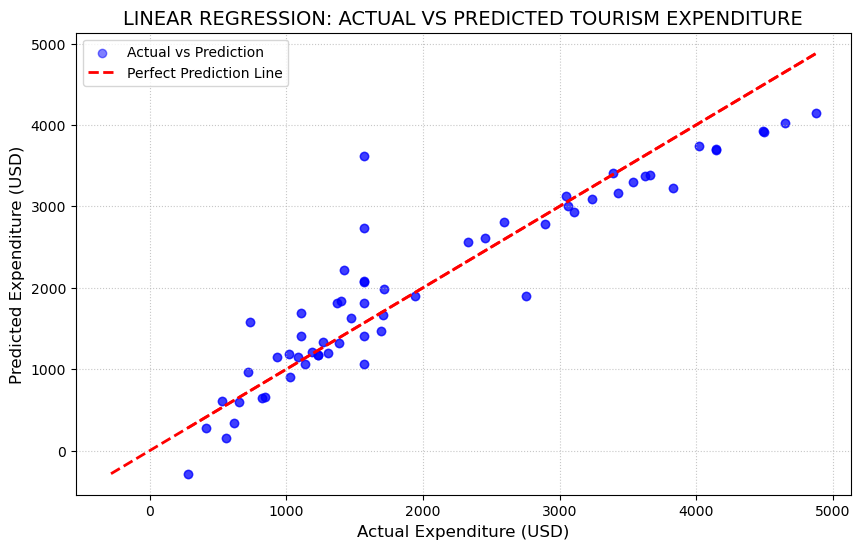

In [28]:
y_pred= best_model.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)  # Diagonal line = perfect prediction
plt.xlabel('Actual Expenditure (USD)', fontsize=12)
plt.ylabel('Predicted Expenditure (USD)', fontsize=12)
plt.title('LINEAR REGRESSION: ACTUAL VS PREDICTED TOURISM EXPENDITURE', fontsize=14)

# Perfect prediction line
line_range = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]

# Plotting Blue dots (Actual vs Prediction)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Prediction')

# Plotting the Red dashed line (Perfect Prediction Line) 
plt.plot(line_range, line_range, color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Shows the labels on the plot
plt.legend(loc='upper left')

plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

In [29]:
import pickle # Allow to save the list of feature colums
# Save the model and the column names for Streamlit
pickle.dump(X.columns,open("tourism_training_columns.pkl", "wb"))

# Save the selected model to a file for later use in Streamlit
with open("tourism_model.pkl", "wb") as f: pickle.dump(best_model, f)

print("Files saved: tourism_model.pkl, tourism_training_columns.pkl")

Files saved: tourism_model.pkl, tourism_training_columns.pkl
